Total unclassified images: 101


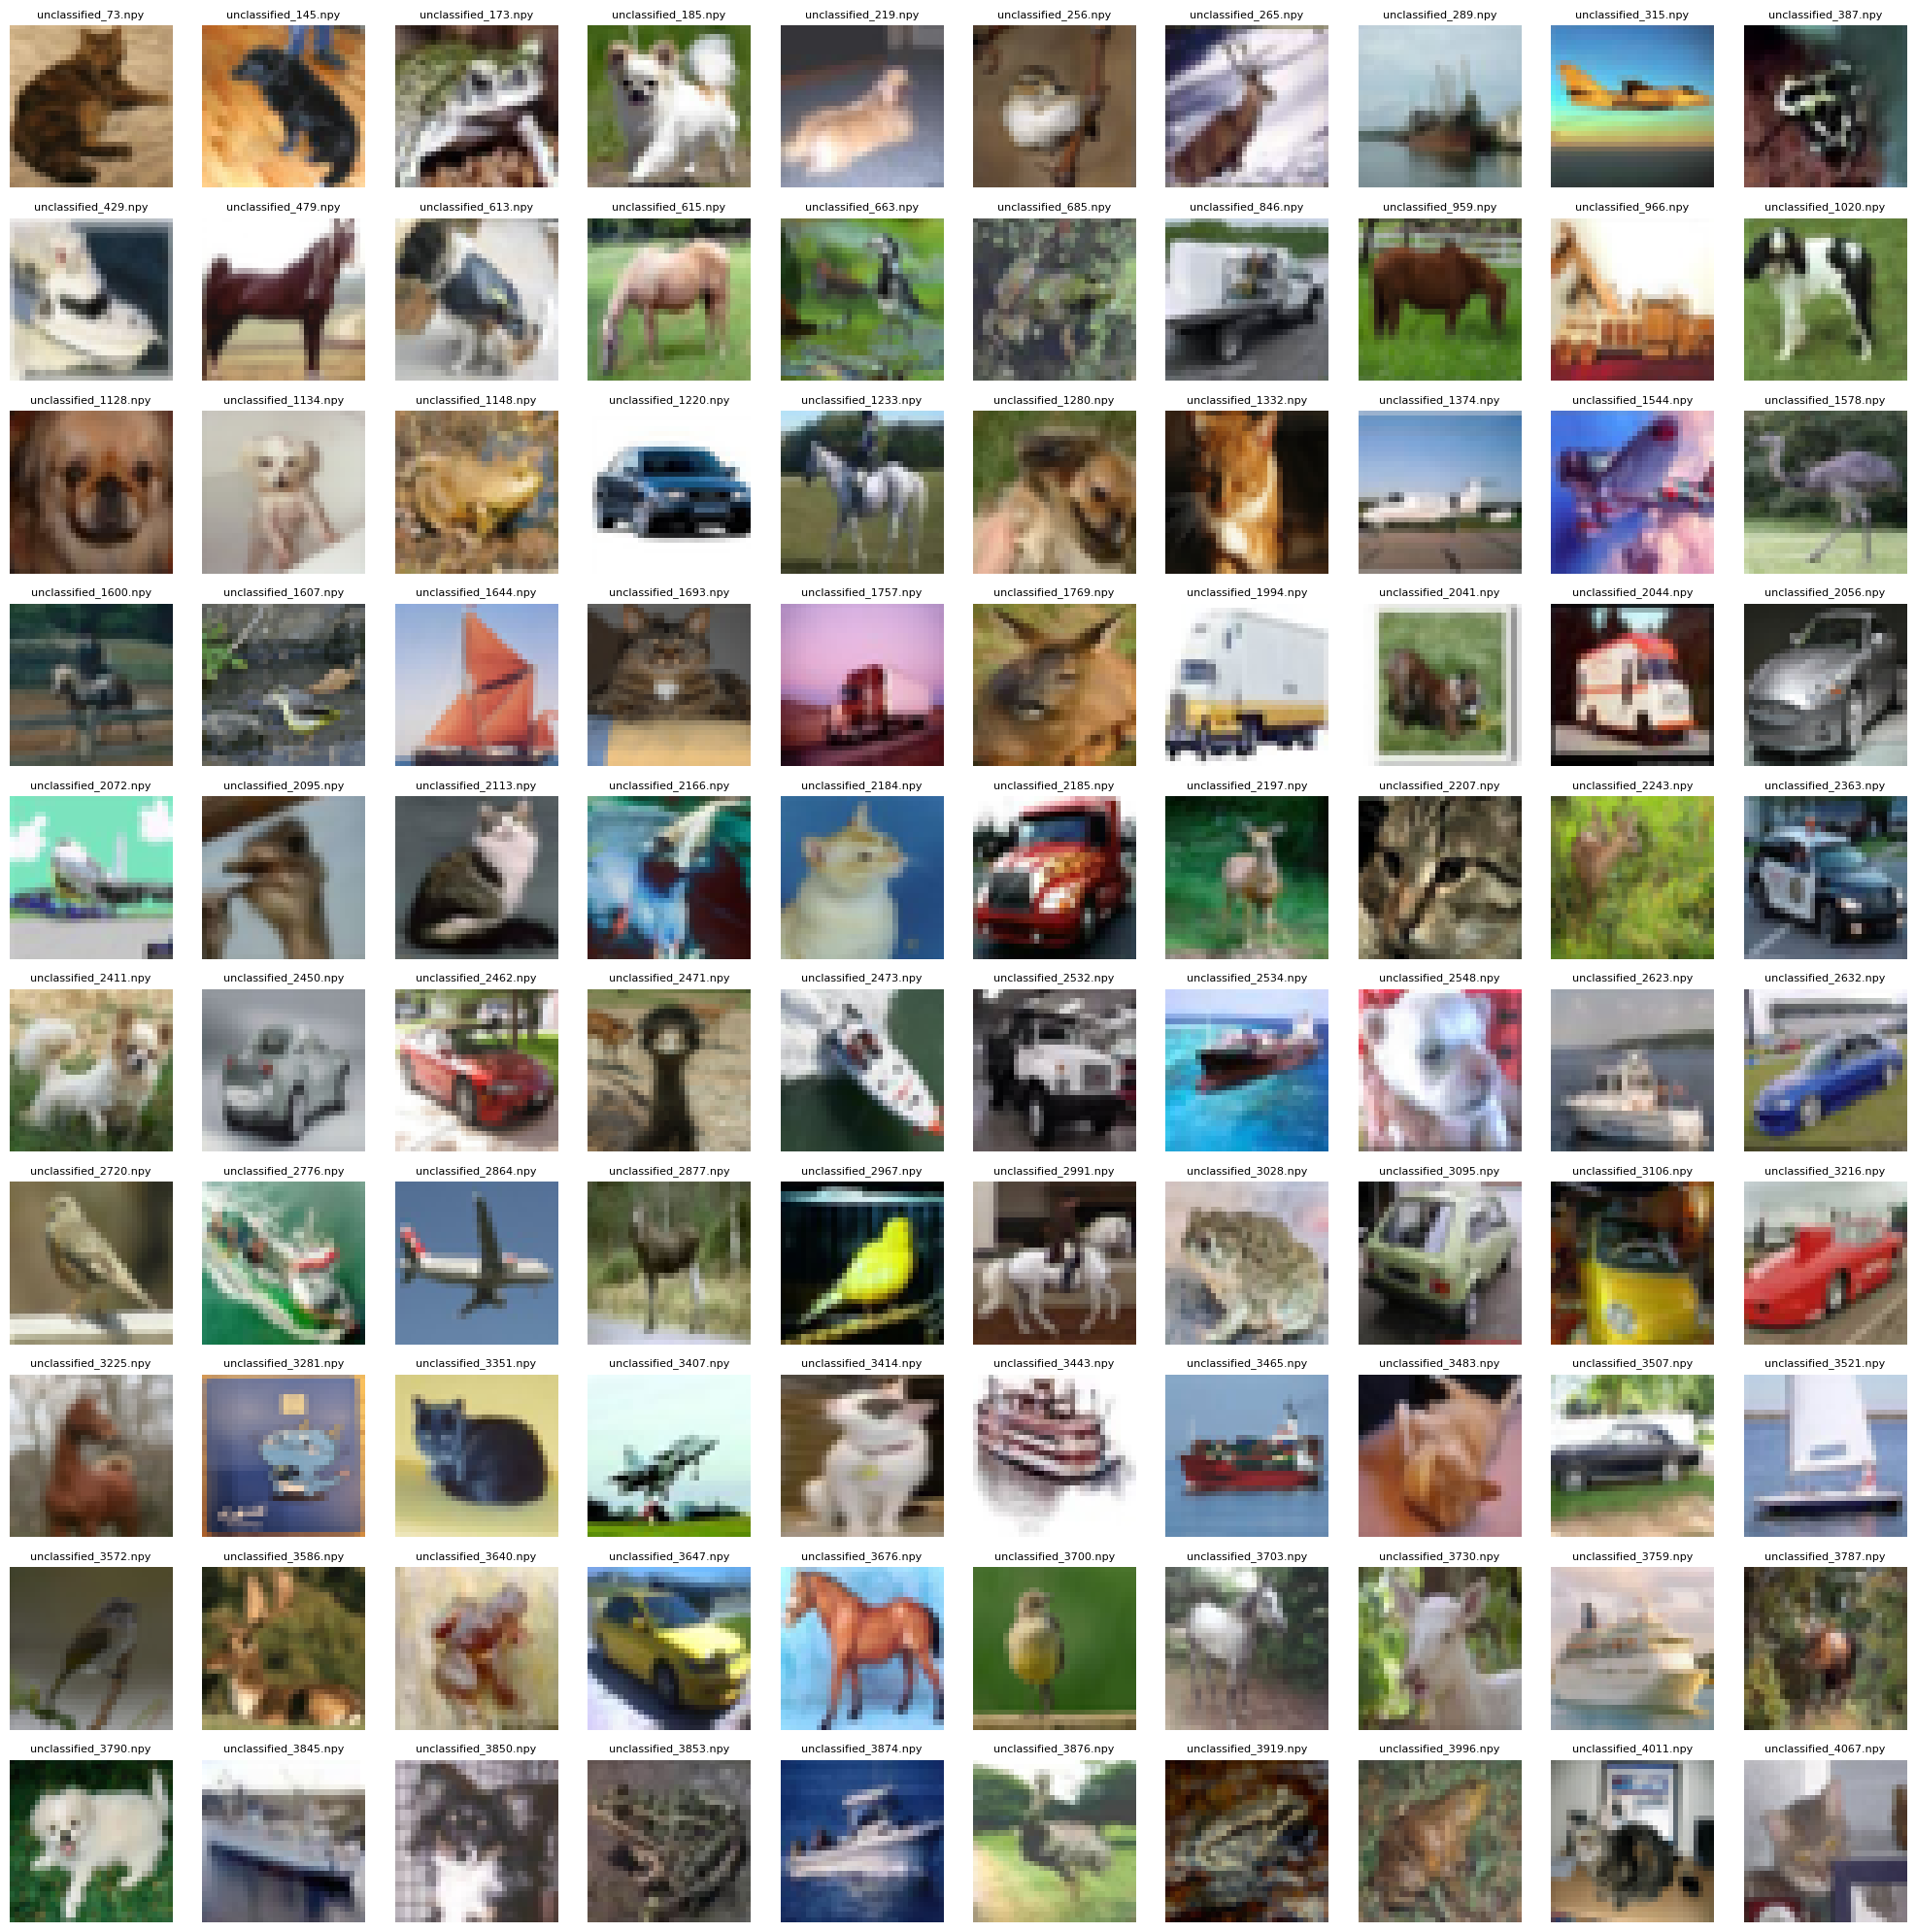

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import os

yourid = 20224531

path = r"C:\github\Data\final_files\p1data.npy"
# Load the data
with open(path, 'rb') as infile:
    test_images = np.load(infile)
    test_labels = np.load(infile)

# Shuffle the data
test_images, test_labels = shuffle(test_images, test_labels, random_state=yourid)

# Create a directory to save the images that cannot be classified
output_dir = r'C:\github\Assignment_archive\전산물리학\Final_exam\unclassified'
os.makedirs(output_dir, exist_ok=True)

# Dummy classifier that returns None for unclassified images
def dummy_classifier(image):
    # This is a placeholder for the actual classifier.
    # It randomly classifies images or returns None for unclassified.
    if np.random.rand() > 0.99:  # 20% chance to be unclassified
        return None
    return np.random.randint(0, 10)

# Save unclassified images
unclassified_count = 0
for i, image in enumerate(test_images):
    label = dummy_classifier(image)
    if label is None:
        unclassified_path = os.path.join(output_dir, f'unclassified_{i}.npy')
        np.save(unclassified_path, image)
        unclassified_count += 1

print(f'Total unclassified images: {unclassified_count}')

# List filenames of unclassified images
unclassified_filenames = [f'unclassified_{i}.npy' for i in range(len(test_images)) if os.path.exists(os.path.join(output_dir, f'unclassified_{i}.npy'))]

# Plot unclassified images
fig, axes = plt.subplots(10, 10, figsize=(20, 20))  # 10x10 grid for 100 images
axes = axes.flatten()

for filename, ax in zip(unclassified_filenames[:100], axes):  # Displaying first 100 for brevity
    image_path = os.path.join(output_dir, filename)
    image = np.load(image_path)
    ax.imshow(image, cmap='gray')
    ax.set_title(filename, fontsize=8)
    ax.axis('off')

plt.tight_layout()
plt.show()
